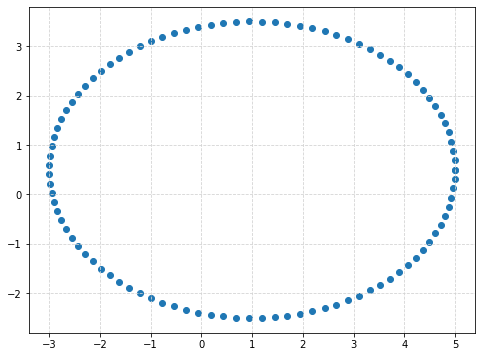

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=4.     #radius on the x-axis
b=3    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.figure(figsize=(8,6))
x =  u+a*np.cos(t)
y =  v+b*np.sin(t)
plt.scatter( x , y )
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [2]:
x_noise = x + np.random.normal(0, 0.05, 100)
y_noise = y + np.random.normal(0, 0.05, 100)

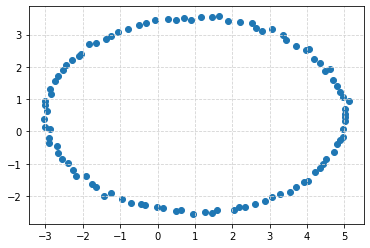

In [3]:
plt.scatter( x_noise , y_noise )
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [99]:
from math import pi, cos, sin
num_samples = 10
xc_range = np.linspace(-1.5, 1.5, 50)       #x-position of the center
yc_range = np.linspace(-1.5, 1.5, 50)    #y-position of the center
xr_range = np.linspace(1., 8., 100)      #radius on the x-axis
yr_range = np.linspace(1., 8., 100)      #radius on the y-axis
t_rot_range = np.linspace(-0.25, 0.25, 100) #rotation angle
t = np.linspace(0, 2*pi, 100)
samples  = np.zeros(shape=(num_samples, 2, 100))
print(samples.shape)
for j in range(num_samples):
#     print(i)
    u=np.random.choice(xc_range, replace=False)     #x-position of the center
    v=np.random.choice(yc_range, replace=False)    #y-position of the center
    a=np.random.choice(xr_range, replace=False)     #radius on the x-axis
    b=np.random.choice(yr_range, replace=False)    #radius on the y-axis
    t_rot = np.random.choice(t_rot_range) * pi
#     print(u, v, a, b, t_rot)
    
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
         #u,v removed to keep the same center location
    R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
         #2-D rotation matrix

    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

    Ell_rot[0,:] += (u + np.random.normal(0, 0.05, 100))
    Ell_rot[1,:] += (v + np.random.normal(0, 0.05, 100))
#     print(Ell_rot.shape)
#     Ell_rot = Ell_rot[np.newaxis, ...]

    samples[j] = Ell_rot


# plt.plot( u+Ell[0,:] , v+Ell[1,:] )     #initial ellipse
# plt.plot( Ell_rot[0,:] , Ell_rot[1,:],'darkorange' )    #rotated ellipse
# plt.grid(color='lightgray',linestyle='--')
# plt.show()

(10, 2, 100)


In [95]:
samples.shape

(10, 2, 100)

In [96]:
samples[5, 1, :].shape

(100,)

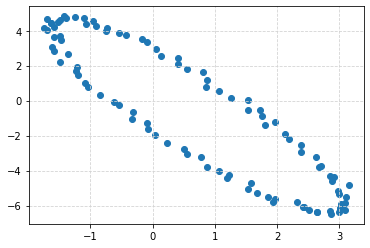

In [97]:
# plt.plot( u+Ell[0,:] , v+Ell[1,:] )     #initial ellipse
plt.scatter( samples[5, 0, :] , samples[5, 1,:] )    #rotated ellipse
plt.grid(color='lightgray',linestyle='--')
plt.show()

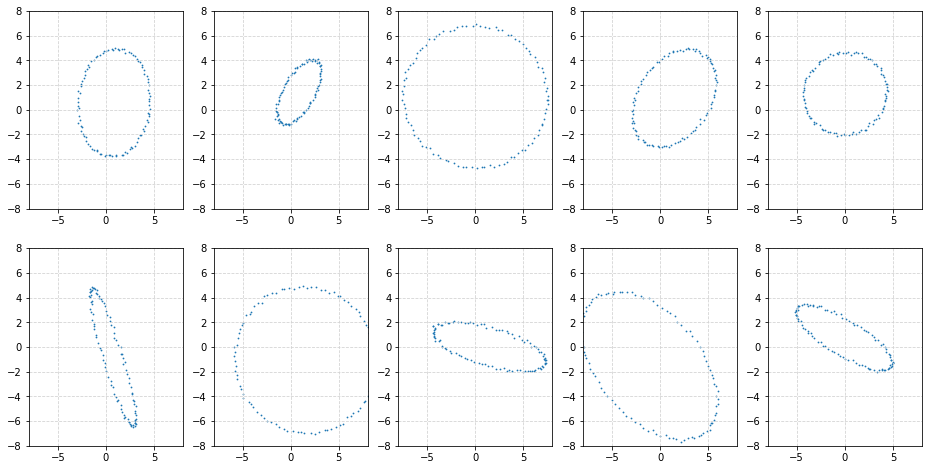

In [98]:
fig, axes = plt.subplots(2,5, figsize=(16, 8))
for i in range(num_samples):
    ax = axes[i//5, i%5]
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)
    ax.scatter(samples[i, 0, :] , samples[i, 1,:], s=0.6)
    ax.grid(color='lightgray',linestyle='--')
plt.show()

In [129]:
test_data = samples.copy()

In [130]:
test_data.shape

(10, 2, 100)

In [131]:
for data in test_data:
#     print(data.shape)
    replace_idx = np.random.randint(data.shape[1], size=10)
#     print(replace_idx)
    replace_x = np.random.uniform(-10, 10, size=10)
    replace_y = np.random.uniform(-10, 10, size=10)
#     print(replace_int)
#     print(replace_x, replace_y)
    data[0][replace_idx] = replace_x
    data[1][replace_idx] = replace_y
#     for idx in replace_idx:
#         data[0][idx] = 
    
#     break

[-9.86256861 -4.84125815 -0.1653663  -1.92448636 -6.28565305  7.23475428
  7.95118091  8.5356271   9.48597155 -8.19401449] [-5.45074927  1.07362173  4.47932281 -9.94639805 -2.03924363  7.2389473
  1.02675223  7.34337834  8.44835891 -3.55019409]
[ 0.29184934 -9.93145056  6.10174558  6.54677942 -4.27236414 -2.06622822
 -6.23129268 -7.77960606  3.56176677 -5.76444806] [-1.91563202 -4.53118718  2.253268   -7.07862143  4.03252655  6.46991549
 -4.05636319 -4.35163971 -5.48649691  2.22307221]
[-6.79485314 -8.95880204  8.50519049  6.36504244 -9.49855578  8.49581869
  8.41839342 -6.81963825 -8.98030643 -3.35605468] [-5.66469892  2.94234894 -9.15030976  0.35970383  7.89275619  0.35658503
 -4.99544676  4.16344404  6.37041288  4.96612809]
[ 3.08841028  1.04313752 -6.44131168  8.73991693 -8.54487047 -0.50129873
  9.26343655 -7.66323496 -8.20270954  9.70723972] [-3.19181151 -0.34604549 -0.73418129  5.3808614  -2.77665414 -5.93704547
  8.95383755 -8.2784556  -7.15978468 -6.48536096]
[ 1.10080057  7.6

In [132]:
test_data[0][0]

array([ 6.89949675,  6.9314179 ,  7.08669719,  7.12379103,  7.15238631,
        7.08985246,  7.04664485,  7.02969253,  6.85359327,  6.75409496,
        6.68365663,  6.4890685 ,  6.33902446,  6.10333384,  5.81545462,
       -8.19401449,  5.39606219,  5.14280169,  4.74734013,  4.3226944 ,
        4.12323493,  3.77548504,  3.33640492,  3.02602525,  2.6516877 ,
        2.1945151 ,  1.84059313,  1.4242355 ,  1.0389006 ,  0.64592246,
        0.14514255, -0.2744536 , -0.57591424, -9.86256861, -1.35694978,
       -1.75584175, -2.14601301, -2.46452053, -2.83045641, -3.24451042,
       -3.50892143, -3.73034007, -4.11375506, -4.33099802, -4.55438176,
       -1.92448636, -4.99448838, -5.11777922, -5.24280852, -5.45284981,
       -5.5410974 , -5.55578035, -5.7481539 , -5.63309049, -5.68589761,
       -5.72130744, -5.49256472, -5.56164334, -5.42584461, -5.31216804,
       -5.17483674,  7.95118091, -4.70267092, -4.61223155, -4.30018243,
       -4.08367014,  7.23475428, -4.84125815, -3.277937  , -2.97

In [143]:
np.where(samples[1][1] != test_data[1][1])

(array([ 3, 13, 16, 21, 56, 61, 65, 74, 76, 91]),)

In [159]:
diff = np.where(samples[3][0] != test_data[3][0])

In [160]:
samples[3][0][diff]

array([ 3.33476657,  3.06824568,  2.21421295,  1.48285614,  1.25720817,
       -1.54231207, -1.97967763, -2.36449468, -3.24543072,  1.07230345])

In [161]:
test_data[3][0][diff]

array([-8.20270954,  9.70723972,  1.04313752,  9.26343655, -7.66323496,
       -0.50129873, -6.44131168, -8.54487047,  3.08841028,  8.73991693])

In [162]:
test_data[3][1][diff]

array([-7.15978468, -6.48536096, -0.34604549,  8.95383755, -8.2784556 ,
       -5.93704547, -0.73418129, -2.77665414, -3.19181151,  5.3808614 ])

In [141]:
np.random.uniform(-10, 10, size=10)

array([ 9.63412768,  2.8535733 ,  9.17074561, -1.42360036,  7.52243632,
       -7.81505113,  7.77741167, -2.54990619, -6.04699357,  8.31676958])

In [142]:
np.random.randint(data.shape[1], size=10)

array([64, 64, 88, 30, 34,  1, 86, 85,  1, 17])

In [149]:
print(samples[1][0][:5], samples[1][1][:5])

[1.06172372 0.915855   0.81327593 0.49267378 0.45923998] [0.57793869 0.83258204 1.12313199 1.37883534 1.67316838]


In [148]:
print(test_data[1][0][:5], test_data[1][1][:5])

[1.06172372 0.915855   0.81327593 3.56176677 0.45923998] [ 0.57793869  0.83258204  1.12313199 -5.48649691  1.67316838]


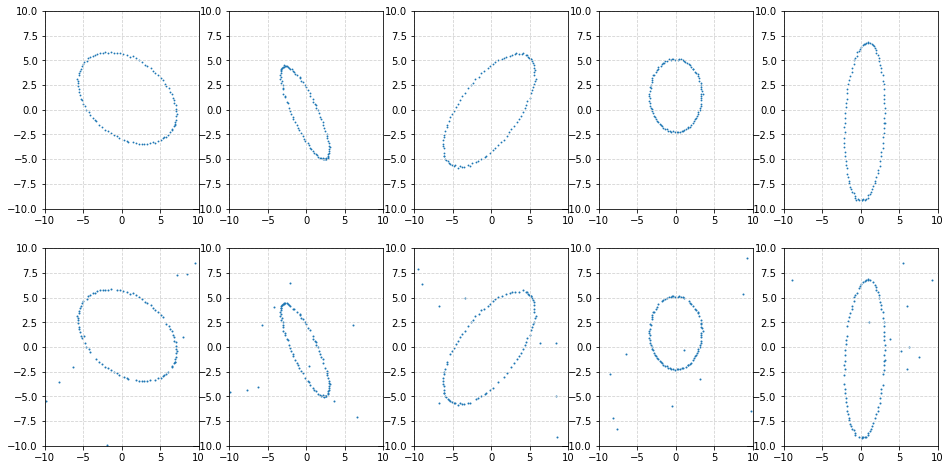

In [163]:
fig, axes = plt.subplots(2,5, figsize=(16, 8))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    if i//5 == 0:
        ax.scatter(samples[i, 0, :] , samples[i, 1,:], s=0.7)
    else:
        ax.scatter(test_data[i%5, 0, :] , test_data[i%5, 1,:], s=1.0)
    ax.grid(color='lightgray',linestyle='--')
plt.show()